# Sales Analysis Project
# Project Statement:
AAL is a household name in Australia, known for its clothing business since 2000. It caters to all groups— kids, women, men, and seniors. It has opened branches in many states in Australia, in metropolises and tier-1 and tier-2 cities. 
The business is booming, and the company is in an expansion mode. It wants to get an in-depth understanding of its sales so that it can make investment decisions. The CEO has tasked the Head of Sales and Marketing (S&M) of AAL to:
Determine the states that are generating the highest revenues and
Formulate sales programs for states with lower revenues. The Head of S&M has approached you for the same.
Analyze the company’s sales data for the fourth quarter across Australia, and state by state and help the company make data-driven decisions for the coming year.

# Import Libraries and and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

# Ignore all warnings
warnings.simplefilter("ignore")

In [2]:
#Load Sales Data
sales_data = pd.read_csv("AusApparalSales4thQrt2020.csv")

In [3]:
sales_data.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


# Data Wrangling

# 1.Check for missing or incorrect data

In [4]:
missing_data = sales_data.isna().sum()

In [5]:
missing_data

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [6]:
incorrect_data = sales_data[sales_data['Sales'] < 0]

In [7]:
incorrect_data

,Date,Time,State,Group,Unit,Sales


# We observed there is no missing or incorrect Data

# 2. Normalize the numerical columns

In [8]:
sales_data['sales_normalized'] = (sales_data['Sales'] - sales_data['Sales'].min()) / (sales_data['Sales'].max() - sales_data['Sales'].min())
sales_data['units_normalized'] = (sales_data['Unit'] - sales_data['Unit'].min()) / (sales_data['Unit'].max() - sales_data['Unit'].min())

In [9]:
sales_data

,Date,Time,State,Group,Unit,Sales,sales_normalized,units_normalized
0,1-Oct-2020,Morning,WA,Kids,8,20000,0.095238,0.095238
1,1-Oct-2020,Morning,WA,Men,8,20000,0.095238,0.095238
2,1-Oct-2020,Morning,WA,Women,4,10000,0.031746,0.031746
3,1-Oct-2020,Morning,WA,Seniors,15,37500,0.206349,0.206349
4,1-Oct-2020,Afternoon,WA,Kids,3,7500,0.015873,0.015873
...,...,...,...,...,...,...,...,...
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000,0.190476,0.190476
7556,30-Dec-2020,Evening,TAS,Kids,15,37500,0.206349,0.206349
7557,30-Dec-2020,Evening,TAS,Men,15,37500,0.206349,0.206349
7558,30-Dec-2020,Evening,TAS,Women,11,27500,0.142857,0.142857


# Data Analysis

# 1. Descriptive Statistical Analysis

In [10]:
sales_summary = sales_data[['Sales', 'Unit']].describe()
sales_summary

,Sales,Unit
count,7560.000000,7560.000000
mean,45013.558201,18.005423
std,32253.506944,12.901403
min,5000.000000,2.000000
25%,20000.000000,8.000000
50%,35000.000000,14.000000
75%,65000.000000,26.000000
max,162500.000000,65.000000


# 2. Determine groups generating highest and lowest sales

In [11]:
group_sales_summary = sales_data.groupby('Group')['Sales'].sum()
top_group = group_sales_summary.idxmax()
lowest_group = group_sales_summary.idxmin()

In [12]:
top_group

' Men'

In [13]:
lowest_group

' Seniors'

# Visualize groups generating highest and lowest sales

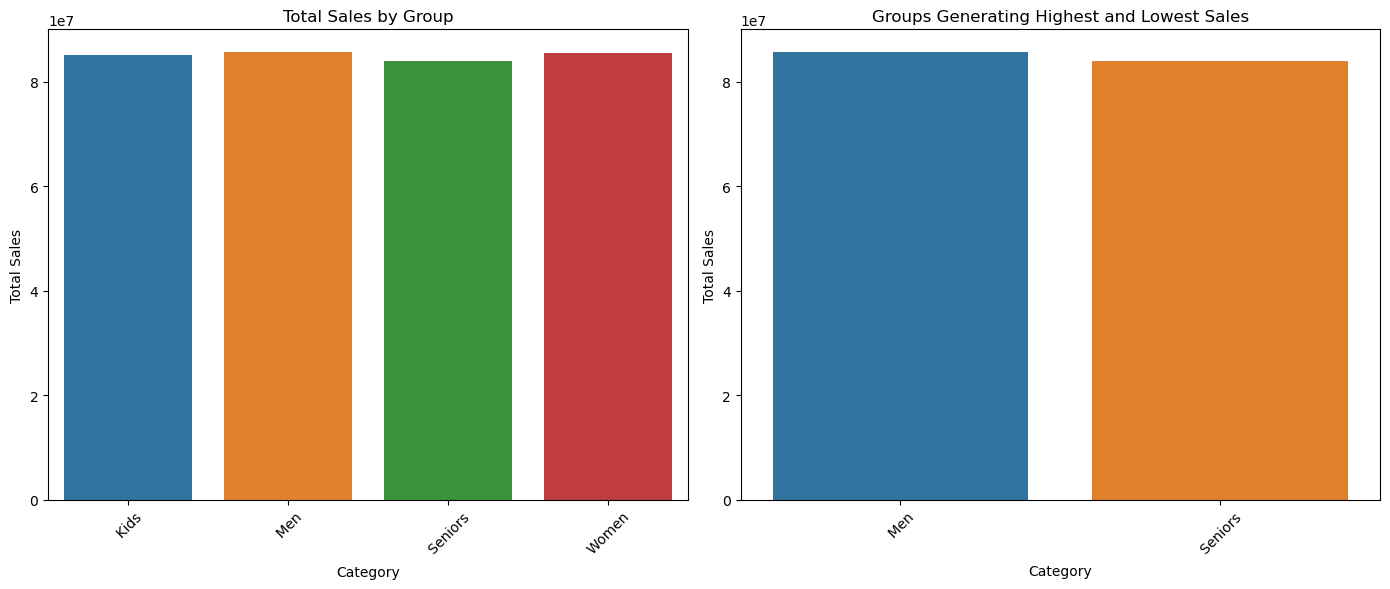

In [14]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=group_sales_summary.index, y=group_sales_summary.values)
plt.title('Total Sales by Group')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x=[top_group, lowest_group], y=[group_sales_summary[top_group], group_sales_summary[lowest_group]])
plt.title('Groups Generating Highest and Lowest Sales')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Determine states generating highest and lowest sales

In [15]:
state_sales_summary = sales_data.groupby('State')['Sales'].sum()
top_state = state_sales_summary.idxmax()
lowest_state = state_sales_summary.idxmin()

In [16]:
top_state

' VIC'

In [17]:
lowest_state

' WA'

# Visualize states generating highest and lowest sales

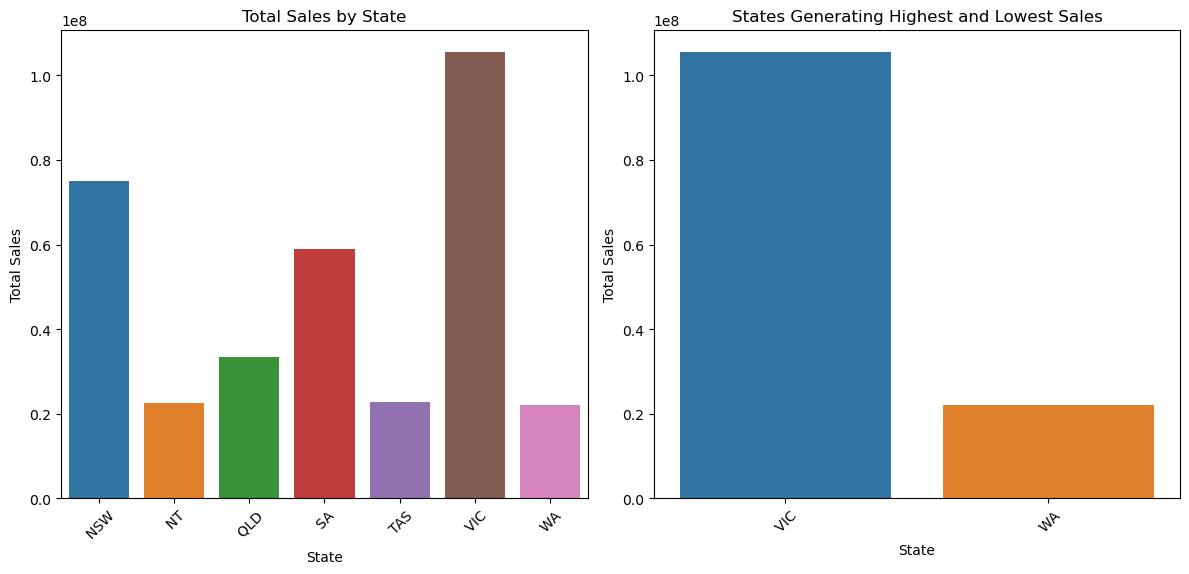

In [18]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=state_sales_summary.index, y=state_sales_summary.values)
plt.title('Total Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x=[top_state, lowest_state], y=[state_sales_summary[top_state], state_sales_summary[lowest_state]])
plt.title('States Generating Highest and Lowest Sales')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Data Visualization

# State-wise sales analysis for different groups

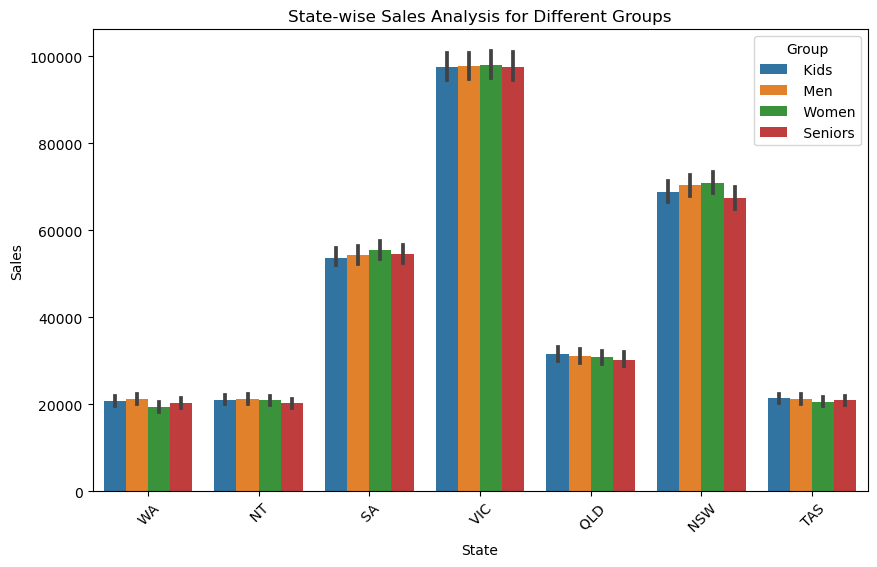

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x='State', y='Sales', hue='Group', data=sales_data)
plt.title('State-wise Sales Analysis for Different Groups')
plt.xlabel('State')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(title='Group')
plt.show()

# Group-wise sales analysis across different states

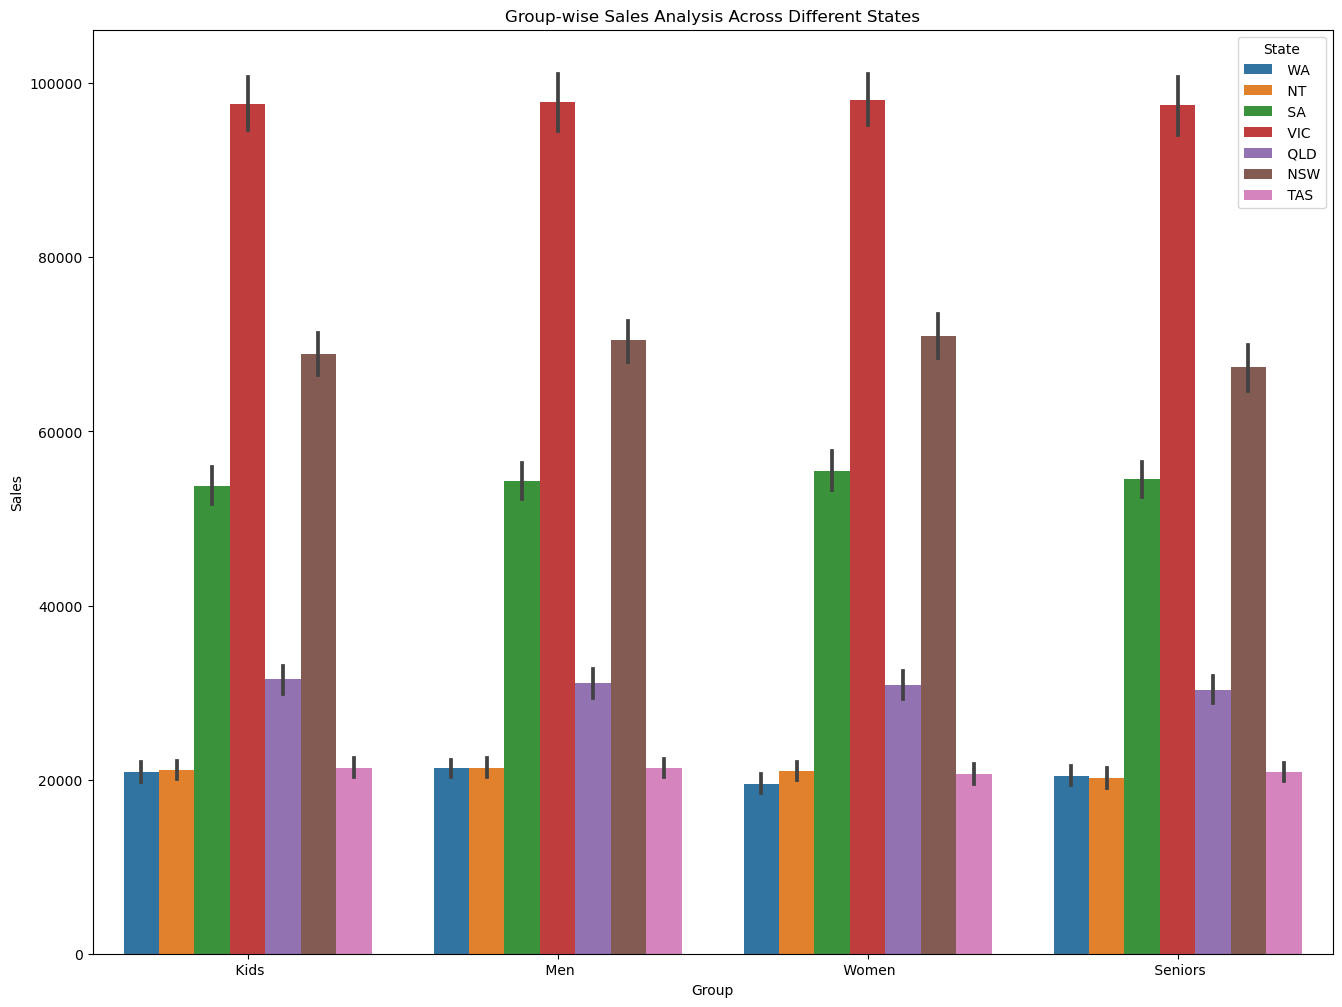

In [20]:
plt.figure(figsize=(16, 12))
sns.barplot(x='Group', y='Sales', hue='State', data=sales_data)
plt.title('Group-wise Sales Analysis Across Different States')
plt.xlabel('Group')
plt.ylabel('Sales')
plt.legend(title='State')
plt.show()

# Time-of-the-day analysis

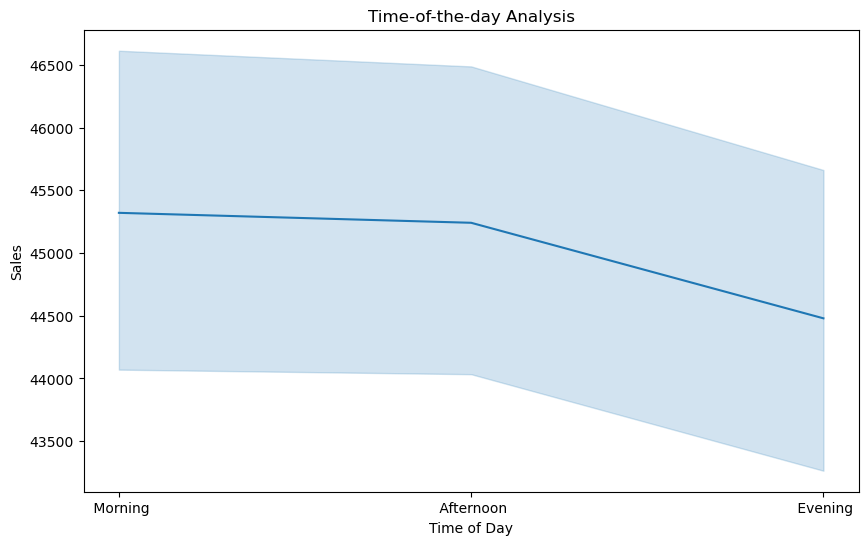

In [21]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Time', y='Sales', data=sales_data)
plt.title('Time-of-the-day Analysis')
plt.xlabel('Time of Day')
plt.ylabel('Sales')
plt.show()

# Report Generation

# Generate weekly, monthly, and quarterly reports

In [22]:
sales_data.dtypes

Date                 object
Time                 object
State                object
Group                object
Unit                  int64
Sales                 int64
sales_normalized    float64
units_normalized    float64
dtype: object

In [23]:
# Convert 'Date' column to datetime
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

In [24]:
# Set 'Date' column as index
sales_data.set_index('Date', inplace=True)

In [25]:
# Resample data by week, month, and quarter, and sum the sales
weekly_report = sales_data.resample('W-Mon').sum()['Sales']
monthly_report = sales_data.resample('M').sum()['Sales']
quarterly_report = sales_data.resample('Q').sum()['Sales']

In [26]:
# Print reports
print("Weekly Report:\n", weekly_report)

Weekly Report:
 Date
2020-10-05    18907500
2020-10-12    26935000
2020-10-19    26805000
2020-10-26    26590000
2020-11-02    20797500
2020-11-09    21065000
2020-11-16    21242500
2020-11-23    21187500
2020-11-30    21442500
2020-12-07    30817500
2020-12-14    32060000
2020-12-21    31247500
2020-12-28    32007500
2021-01-04     9197500
Freq: W-MON, Name: Sales, dtype: int64


In [27]:
print("\nMonthly Report:\n", monthly_report)


Monthly Report:
 Date
2020-10-31    114290000
2020-11-30     90682500
2020-12-31    135330000
Freq: M, Name: Sales, dtype: int64


In [28]:
print("\nQuarterly Report:\n", quarterly_report)


Quarterly Report:
 Date
2020-12-31    340302500
Freq: Q-DEC, Name: Sales, dtype: int64


# Visualize weekly, monthly, and quarterly reports

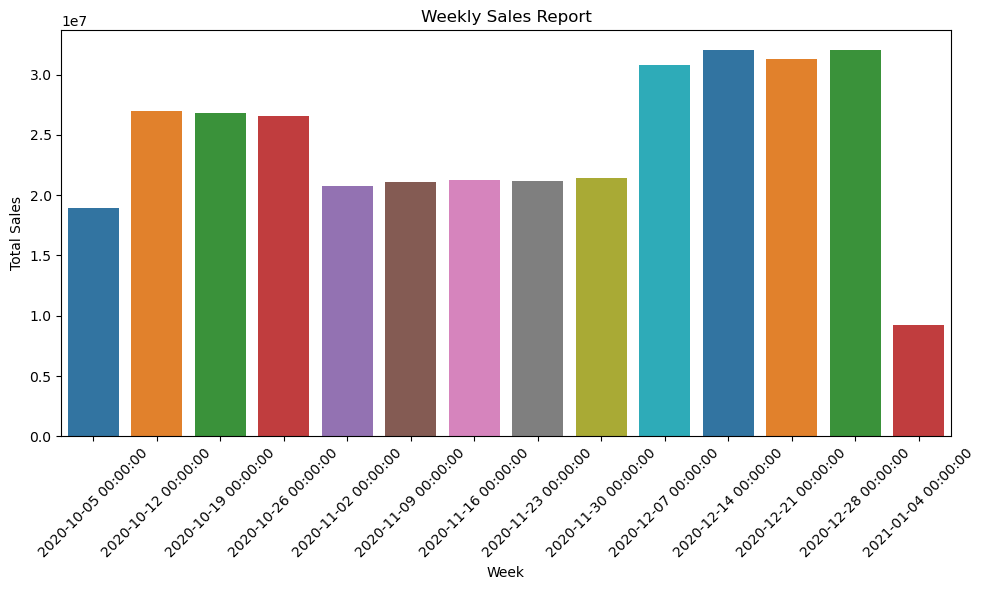

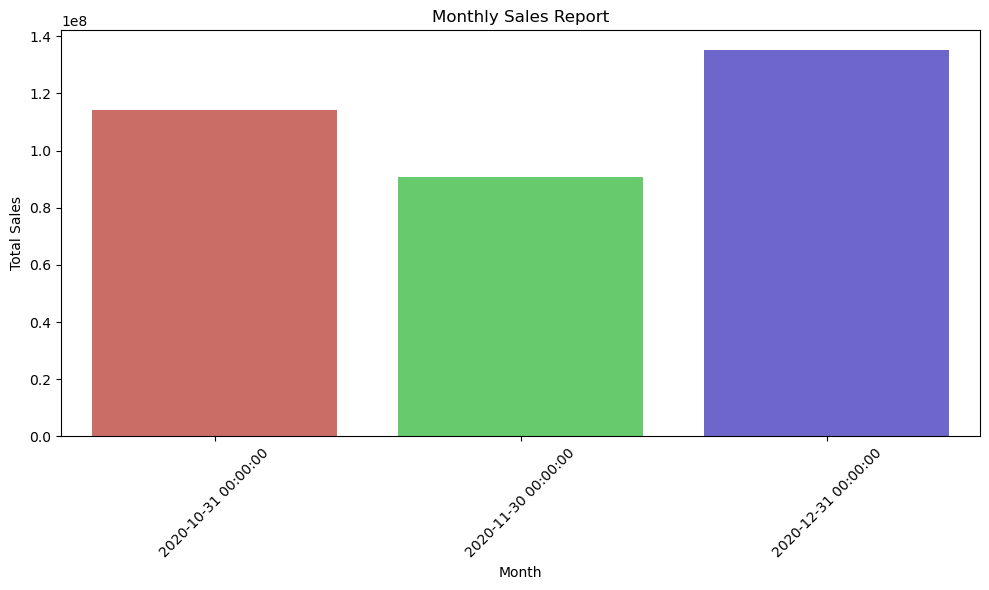

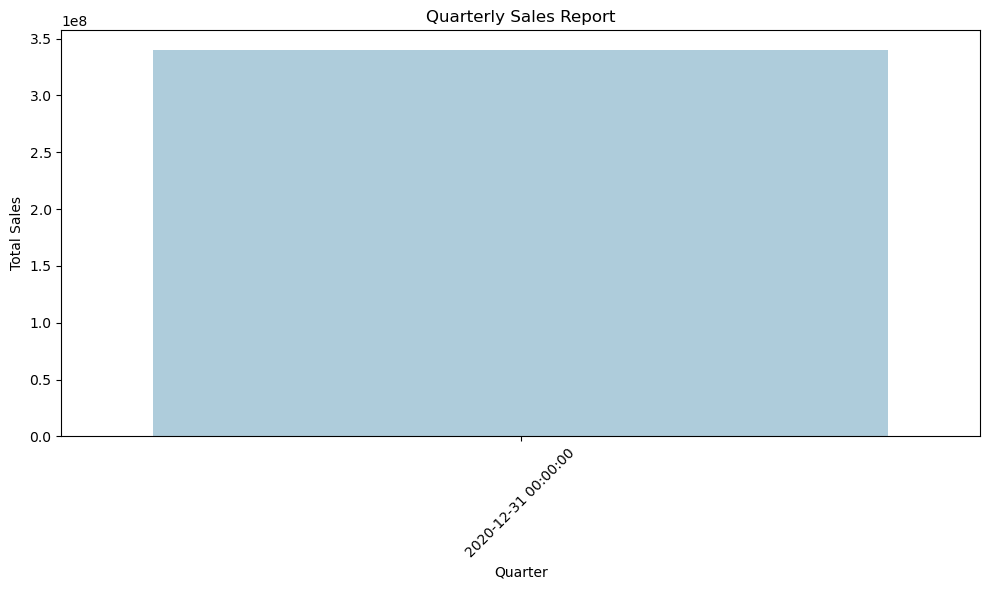

In [29]:
# Plot weekly report with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=weekly_report.index, y=weekly_report.values, palette='tab10')
plt.title('Weekly Sales Report')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot monthly report with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_report.index, y=monthly_report.values, palette='hls')
plt.title('Monthly Sales Report')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot quarterly report with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=quarterly_report.index, y=quarterly_report.values, palette='Paired')
plt.title('Quarterly Sales Report')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Combined weekly, monthly, and quarterly reports

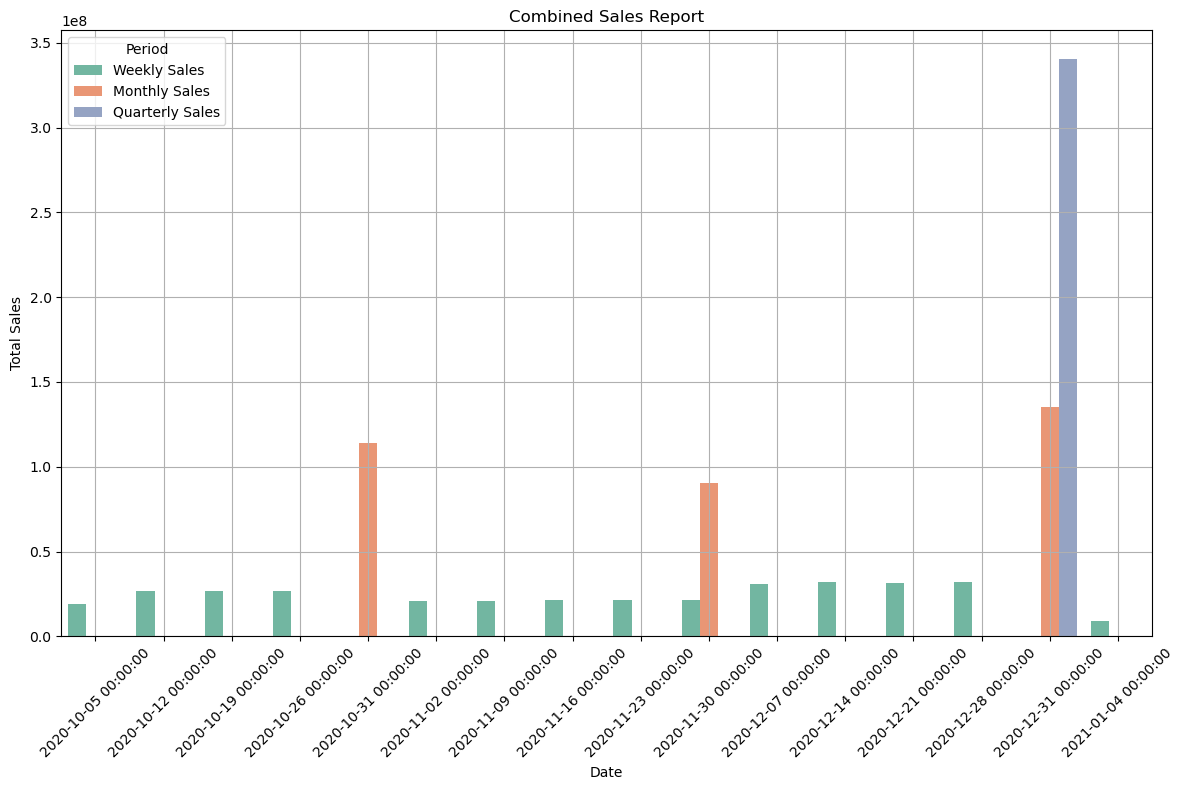

In [30]:
# Combine the reports into a single DataFrame
combined_report = pd.concat([weekly_report, monthly_report, quarterly_report], axis=1)
combined_report.columns = ['Weekly Sales', 'Monthly Sales', 'Quarterly Sales']

# Reset index to convert dates to a column
combined_report.reset_index(inplace=True)

# Melt the DataFrame to have 'Date' as x-axis and 'Sales' as y-axis
melted_report = pd.melt(combined_report, id_vars='Date', var_name='Report Period', value_name='Sales')

# Plot the combined report using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=melted_report, x='Date', y='Sales', hue='Report Period',palette='Set2')
plt.title('Combined Sales Report')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Period', loc='upper left')
plt.tight_layout()
plt.show()

# Creating a Sales Dashbord of Sales Analysis With Dash

In [31]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objs as go
import pandas as pd

In [32]:
# Load and preprocess data

# Determine highest and lowest sales groups and states
highest_group = sales_data.groupby('Group')['Sales'].sum().idxmax()
lowest_group = sales_data.groupby('Group')['Sales'].sum().idxmin()
highest_state = sales_data.groupby('State')['Sales'].sum().idxmax()
lowest_state = sales_data.groupby('State')['Sales'].sum().idxmin()

# Generate weekly, monthly, and quarterly reports
weekly_report = sales_data.resample('W').sum()['Sales']
monthly_report = sales_data.resample('M').sum()['Sales']
quarterly_report = sales_data.resample('Q').sum()['Sales']

# State-wise sales analysis for different groups
state_group_sales = pd.pivot_table(sales_data, values='Sales', index='State', columns='Group', aggfunc='sum')

# Group-wise sales analysis across different states
group_state_sales = pd.pivot_table(sales_data, values='Sales', index='Group', columns='State', aggfunc='sum')


In [33]:
# Initialize Dash app
app = dash.Dash(__name__)

# Define layout
app.layout = html.Div([
    html.H1('Sales Dashboard'),
    
    html.Div([
        html.H2('Sales Analysis'),
        html.Div([
            html.Div([
                html.H3('Highest and Lowest Sales Groups'),
                html.P(f'Highest Sales Group: {highest_group}'),
                html.P(f'Lowest Sales Group: {lowest_group}')
            ], className='six columns'),
            html.Div([
                html.H3('Highest and Lowest Sales States'),
                html.P(f'Highest Sales State: {highest_state}'),
                html.P(f'Lowest Sales State: {lowest_state}')
            ], className='six columns')
        ], className='row'),
        
        html.Div([
            html.Div([
                html.H3('Weekly Report'),
                dcc.Graph(
                    id='weekly-report',
                    figure={
                        'data': [
                            {'x': weekly_report.index, 'y': weekly_report.values, 'type': 'line', 'name': 'Weekly Sales'}
                        ],
                        'layout': {
                            'title': 'Weekly Sales Report'
                        }
                    }
                )
            ], className='four columns'),
            html.Div([
                html.H3('Monthly Report'),
                dcc.Graph(
                    id='monthly-report',
                    figure={
                        'data': [
                            {'x': monthly_report.index, 'y': monthly_report.values, 'type': 'line', 'name': 'Monthly Sales'}
                        ],
                        'layout': {
                            'title': 'Monthly Sales Report'
                        }
                    }
                )
            ], className='four columns'),
            html.Div([
                html.H3('Quarterly Report'),
                dcc.Graph(
                    id='quarterly-report',
                    figure={
                        'data': [
                            {'x': quarterly_report.index, 'y': quarterly_report.values, 'type': 'line', 'name': 'Quarterly Sales'}
                        ],
                        'layout': {
                            'title': 'Quarterly Sales Report'
                        }
                    }
                )
            ], className='four columns')
        ], className='row')
    ]),
    
    html.Div([
        html.H2('State-wise Sales Analysis for Different Groups'),
        dcc.Graph(
            id='state-group-sales',
            figure={
                'data': [
                    {'x': state_group_sales.index, 'y': state_group_sales[group], 'type': 'bar', 'name': group}
                    for group in state_group_sales.columns
                ],
                'layout': {
                    'title': 'State-wise Sales Analysis for Different Groups'
                }
            }
        )
    ]),
    
    html.Div([
        html.H2('Group-wise Sales Analysis Across Different States'),
        dcc.Graph(
            id='group-state-sales',
            figure={
                'data': [
                    {'x': group_state_sales.index, 'y': group_state_sales[state], 'type': 'bar', 'name': state}
                    for state in group_state_sales.columns
                ],
                'layout': {
                    'title': 'Group-wise Sales Analysis Across Different States'
                }
            }
        )
    ])
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)